In [1]:
import pandas as pd
import numpy as np 

1. Il file weather.csv contiene informazioni sul meteo di alcune città australiane. Caricare il suo contenuto in un dataframe.

   Quante righe e quante colonne ci sono nel dataset?

   Ci sono valori mancanti?

In [2]:
df = pd.read_csv('../data/weather.csv', sep=';')
df.head()
n_rows = df.index.size 
n_cols = df.columns.size
print(f'rows: {n_rows}, cols: {n_cols}')

df.isna().any()


rows: 14468, cols: 17


Month            False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [3]:
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No


2. Aggiungere al dataset:

- una nuova colonna "temp_diff" con la differenza in valore assoluto tra i valori di temperatura alle 9 del mattino e le 3 del pomeriggio

- una nuova colonna "hum_diff" con la differenza in valore assoluto tra i valori di umidità alle 9 del mattino e le 3 del pomeriggio

In [4]:
df.head()
df['temp_diff'] = np.abs(df['Temp9am'] - df['Temp3pm'])
df['hum_diff'] = np.abs(df['Humidity9am'] - df['Humidity3pm'])

3. Selezionare soltanto le righe in cui "temp_diff" è maggiore di 10 e "hum_diff" è maggiore di 20. Qual è la location in cui si verifica più spesso questa elevata escursione termica (ovvero la location con il maggior numero di righe nella selezione)?

In [5]:
df_tmp = df.query('temp_diff > 10 and hum_diff > 20')
df_tmp.groupby('Location').count().idxmax()

Month            Richmond
MinTemp          Richmond
MaxTemp          Richmond
Rainfall         Richmond
WindGustSpeed    Richmond
WindSpeed9am     Richmond
WindSpeed3pm     Richmond
Humidity9am      Richmond
Humidity3pm      Richmond
Pressure9am      Richmond
Pressure3pm      Richmond
Cloud3pm         Richmond
Temp9am          Richmond
Temp3pm          Richmond
RainToday        Richmond
RainTomorrow     Richmond
temp_diff        Richmond
hum_diff         Richmond
dtype: object

4. Quante location sono presenti nel file?

In [6]:
df.head()
df['Location'].unique().size

42

5. Trasformare i valori della colonna "RainToday" convertendo "yes" in 1 e "no" in 0. Utilizzando il metodo groupby calcolare per ogni location il numero di giorni di pioggia.

In [7]:
df.head()
df['rain_numeric'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df.groupby('Location')['rain_numeric'].sum()

Location
Adelaide             90
Albury               88
AliceSprings         39
BadgerysCreek        57
Ballarat            110
Bendigo              90
Brisbane             75
Cairns               88
Canberra             81
Cobar                48
CoffsHarbour         80
Dartmoor            126
Darwin               95
GoldCoast            65
Hobart               94
Melbourne            79
MelbourneAirport     96
Mildura              46
Moree                45
MountGambier        123
Nhil                 74
NorahHead            82
NorfolkIsland       122
Nuriootpa            89
PearceRAAF           77
Perth                91
PerthAirport         79
Portland            145
Richmond             61
Sale                 73
Sydney               83
SydneyAirport        84
Townsville           54
Tuggeranong          84
Uluru                37
WaggaWagga           86
Walpole             130
Watsonia             91
Williamtown          70
Witchcliffe         119
Wollongong           68
Woomera

6. Creare una tabella pivot in cui per ogni location (sulle righe) e per ogni mese (sulle colonne) sia calcolata la temperatura massima media.

In [8]:
df.pivot_table(index = 'Location', columns='Month', values='MaxTemp', aggfunc='mean')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Location,,,,,,,,,,,,
Adelaide,31.190323,29.289655,28.641935,24.826667,19.793548,16.043333,15.283871,17.658065,17.420000,20.993548,24.706667,28.658065
Albury,31.487097,32.441379,30.790323,25.810000,18.077419,13.423333,13.280645,15.248387,16.823333,19.667742,25.586667,30.500000
AliceSprings,34.858065,37.179310,35.148387,31.824138,25.370000,20.690000,21.080000,22.638710,24.620000,30.516667,35.383333,34.532000
BadgerysCreek,28.792857,30.251724,29.412903,26.246667,23.225806,18.106667,18.483871,18.716129,21.093103,24.477419,29.734483,32.369231
Ballarat,26.934483,26.288889,24.796667,20.093333,14.925806,10.551724,10.151613,11.803226,13.190000,15.556667,19.276667,24.596667
Bendigo,30.100000,30.881481,28.996774,23.186667,17.045161,12.746667,12.812903,14.251613,15.520000,18.925806,24.383333,28.664516
Brisbane,30.374074,32.303846,29.929032,28.783333,26.983871,21.526667,22.464516,23.153333,24.880000,27.083871,30.388889,30.058065
Cairns,32.116667,33.248276,31.761290,30.431034,28.636842,27.413333,26.977419,26.600000,28.300000,30.100000,31.939130,32.150000
Canberra,28.541935,29.306897,27.690323,23.880000,17.326667,13.013333,12.741935,14.258065,15.793333,18.477419,25.425926,28.716667


7. Visualizzare in un unico grafico la distribuzione dei valori di temperatura massima nel mese di maggio (5) e dicembre (12).

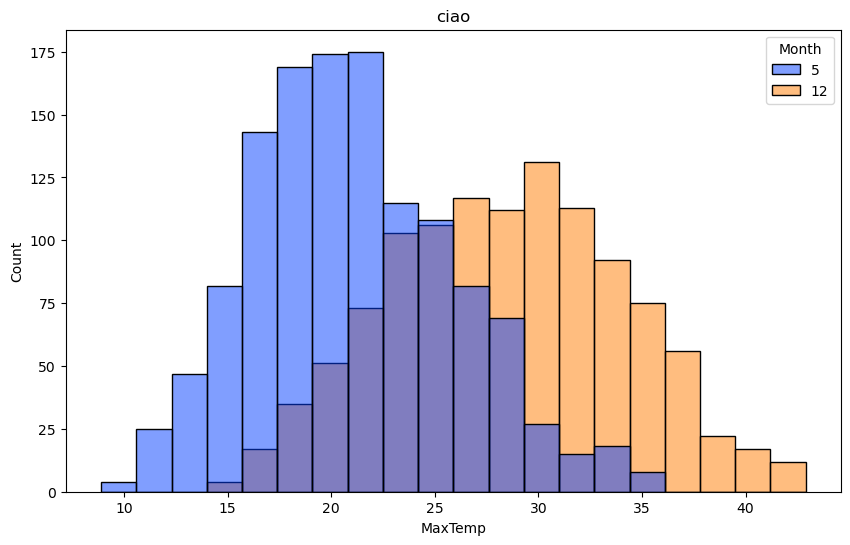

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

data = df.query('Month == 5 or Month == 12')

plt.figure(figsize=(10, 6))
plt.title(label='ciao')
sns.histplot(data=data, x='MaxTemp', hue='Month', bins=20, palette='bright')
plt.show()

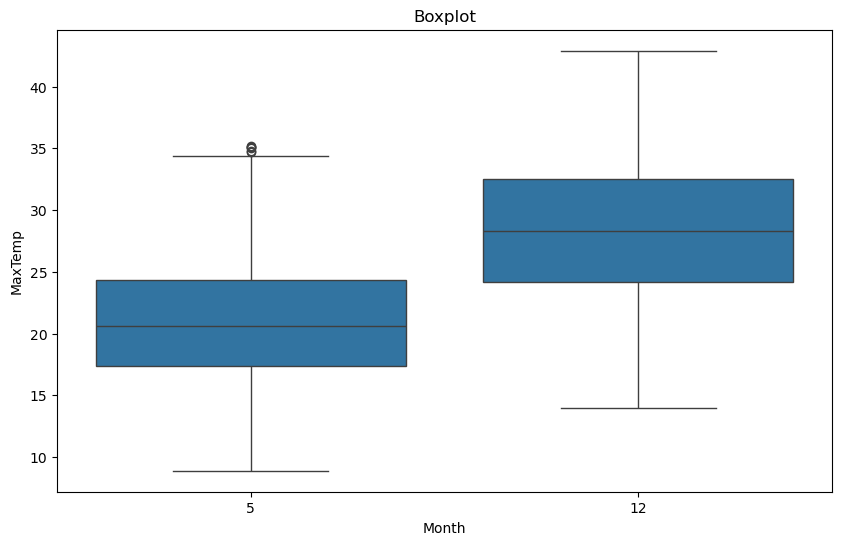

In [ ]:
## Boxplot

data = df.query('Month == 5 or Month == 12')

plt.figure(figsize=(10,6))
plt.title('Boxplot')
sns.boxplot(data=data, x='Month', y='MaxTemp')
plt.show()

8. Visualizzare in uno scatterplot la relazione tra i valori di pressione e i valori di umidità (fare 2 plot distinti nella stessa figura, uno per i valori 9am e un altro per i valori 3pm). Colorare i punti di due colori diversi in base ai valori di RainToday.

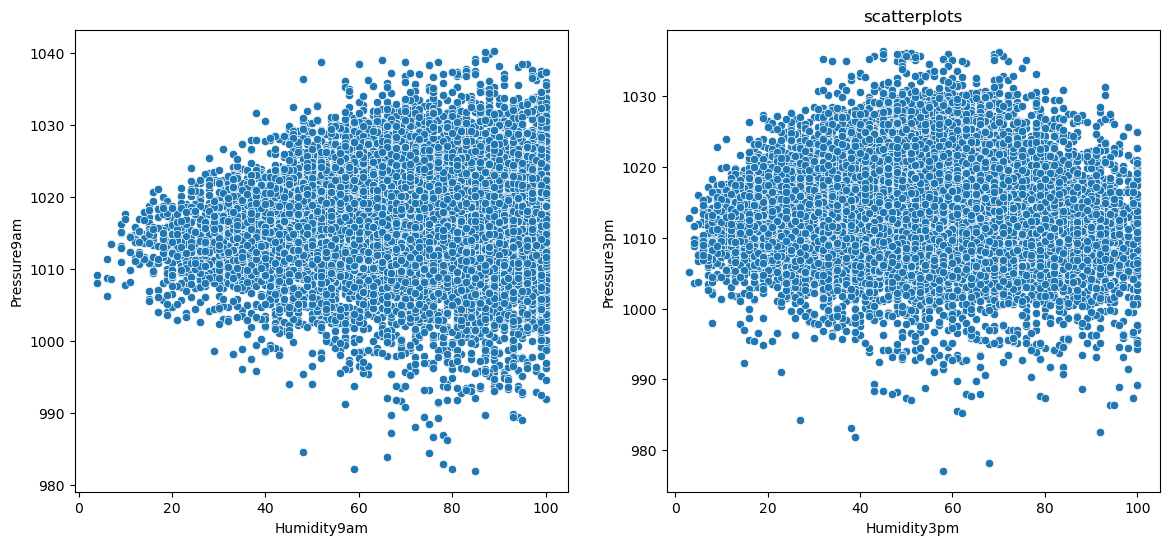

In [24]:
df_cleaned = df[df['Pressure3pm'] > 500]

fig, axes = plt.subplots(1, 2, figsize=(14,6))
plt.title('scatterplots')
sns.scatterplot(data=df_cleaned, x='Humidity9am', y='Pressure9am', ax=axes[0])
sns.scatterplot(data=df_cleaned, x='Humidity3pm', y='Pressure3pm', ax=axes[1])
plt.show()